In [1]:
# Facebook page analysis starter
import html
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load facebook dataset: Australian cosmetics company page
df = pd.read_csv("https://raw.githubusercontent.com/multidis/hult-social-media-analytics/main/data/brand_posts.csv")
df

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments
0,2012-06-20 15:12:38,"Ummm, yum! What would be in your ULTIMATE naug...",photo,Australis Cosmetics with Evalyn McGregor-Koch ...,715,47,46,0.0,0.0,0.0,0.0,0.0,that looks awesome Icecream with crushed oreo....
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...
2,2012-06-22 10:41:36,Seems like some celebs can get away with any h...,photo,NaN,161,12,2,0.0,0.0,0.0,0.0,0.0,blonde her eye colour is different Way better ...
3,2012-06-22 15:37:04,We absolutely adore our bling here at Australi...,photo,NaN,30,0,0,0.0,0.0,0.0,0.0,0.0,NaN
4,2012-06-25 10:26:10,You know you want to... :P,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,117,0,6,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2017-01-08 17:00:00,Are you a porcelain princess who just can�t fi...,photo,NaN,150,70,4,11.0,0.0,0.0,0.0,1.0,Yes but I also have such an intense red tone i...
2040,2017-01-09 19:30:00,Blend Velourlips NY-Cee and Doo-Bai to achieve...,photo,NaN,35,1,0,0.0,0.0,0.0,0.0,0.0,She looked gorgeous <ed><U+00A0><U+00BD><ed><U...
2041,2017-01-10 09:30:00,FREE brush alert! To help you start the year w...,photo,NaN,40,4,1,0.0,0.0,1.0,0.0,0.0,I have this and it's honestly the best brush e...
2042,2017-01-15 16:30:00,Add some glow to your look with the High Life ...,photo,NaN,24,2,1,1.0,0.0,0.0,0.0,0.0,These are the best! But bring back the pan sti...


In [3]:
# post text
df['message'][10]

"Congrats to our lucky winners! The three of you have won our latest competition... Which means there's a $100 Nicole Fendel Jewellery online store gift voucher and a Jumbo Bronzer headed your way! We're a bit jealous ;)"

In [4]:
# comments (combined)
df['comments'][10]

"I am so thrilled!! THANK YOU THANK YOU THANK YOU AUSTRALIS X congrats all! You are very welcome, Alanis! xx Thank you so much Australis!!! So excited xx Hi Cat! You're welcome :) Tell us what you pick up from Nicole Fendel Jewellery when you get your prize! xx Just received my gorgeous Sandstone Turquoise Ring from Nicole Fendel Jewellery Thanks so much!!"

In [5]:
df['comments_count'][10]

7

In [6]:
# total likes, shares, and comments count for each post
df[['likes_count', 'shares_count', 'comments_count']]

,likes_count,shares_count,comments_count
0,715,46,47
1,1103,80,8
2,161,2,12
3,30,0,0
4,117,6,0
...,...,...,...
2039,150,4,70
2040,35,0,1
2041,40,1,4
2042,24,1,2


In [7]:
# some posts were loved by many users
df['love_count'].max()

92.0

In [8]:
# occasional users were angried by some posts
df['angry_count'].max()

2.0

In [9]:
# types of post and average likes:
# see "Pandas example tasks" earlier class session

In [10]:
# keywords occurring throughout all of the posts: clean up the text first
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    # if not a string object, disregard
    if not isinstance(s, str):
        return ''
    
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [11]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df['message_clean'] = df['message'].apply(text_cleanup)
df

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
0,2012-06-20 15:12:38,"Ummm, yum! What would be in your ULTIMATE naug...",photo,Australis Cosmetics with Evalyn McGregor-Koch ...,715,47,46,0.0,0.0,0.0,0.0,0.0,that looks awesome Icecream with crushed oreo....,ummm yum would ultimate naughty treat
1,2012-06-21 15:09:46,Click 'like' if you worry about that too! <3 <3,photo,NaN,1103,8,80,0.0,0.0,0.0,0.0,0.0,:\ true. i agree I just moved and I am particu...,click worry 3 3
2,2012-06-22 10:41:36,Seems like some celebs can get away with any h...,photo,NaN,161,12,2,0.0,0.0,0.0,0.0,0.0,blonde her eye colour is different Way better ...,seems like celebs get away hair colour check n...
3,2012-06-22 15:37:04,We absolutely adore our bling here at Australi...,photo,NaN,30,0,0,0.0,0.0,0.0,0.0,0.0,NaN,absolutely adore bling australis hq nothing ma...
4,2012-06-25 10:26:10,You know you want to... :P,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,117,0,6,0.0,0.0,0.0,0.0,0.0,NaN,know want p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2017-01-08 17:00:00,Are you a porcelain princess who just can�t fi...,photo,NaN,150,70,4,11.0,0.0,0.0,0.0,1.0,Yes but I also have such an intense red tone i...,porcelain princess cant find foundation light ...
2040,2017-01-09 19:30:00,Blend Velourlips NY-Cee and Doo-Bai to achieve...,photo,NaN,35,1,0,0.0,0.0,0.0,0.0,0.0,She looked gorgeous <ed><U+00A0><U+00BD><ed><U...,blend velourlips achieve perfect bold lip insp...
2041,2017-01-10 09:30:00,FREE brush alert! To help you start the year w...,photo,NaN,40,4,1,0.0,0.0,1.0,0.0,0.0,I have this and it's honestly the best brush e...,free brush alert help start year flawless face...
2042,2017-01-15 16:30:00,Add some glow to your look with the High Life ...,photo,NaN,24,2,1,1.0,0.0,0.0,0.0,0.0,These are the best! But bring back the pan sti...,add glow look high life highlighting powder ed...


In [12]:
# combine all post text entries
text_all = ' '.join(df['message_clean'])

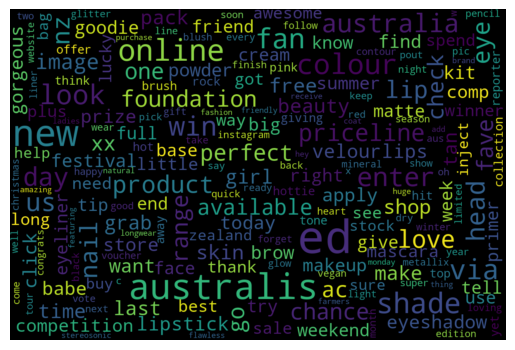

In [13]:
# keywords occurring throughout all of the posts
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(text_all)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [14]:
# top-most commented entries
df.sort_values(by='comments_count', ascending=False).head(10)

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
1367,2014-09-24 19:30:00,Get ready � Oh Hai Brow is coming. Want to try...,photo,NaN,805,2241,95,0.0,0.0,0.0,0.0,0.0,Crystal Kells Tash On Carly Kenny Samie Nichol...,get ready oh hai brow coming want try anyone e...
1419,2014-12-03 19:30:01,"Christmas is about giving, so we�re giving you...",photo,NaN,495,679,56,0.0,0.0,0.0,0.0,0.0,So she can do her own brows and add some colou...,christmas giving giving chance win 2 australis...
1972,2016-10-16 17:00:00,Oh yes! Here's the game changer....our NEW Mat...,photo,NaN,1214,627,42,87.0,1.0,48.0,0.0,0.0,Kayleigh Christ Josie Ponsonby Doan Hoang Niki...,oh yes game changer new match maker shade adju...
1764,2016-01-29 13:10:31,Did you guess? <ed><U+00A0><U+00BC><ed><U+00BD...,photo,NaN,1875,624,35,0.0,0.0,0.0,0.0,0.0,Amy Morley Emma Skinner Sarah Di Iorio yasss L...,guess ed ed ed ed ed ed
1315,2014-08-11 18:35:00,To celebrate the release of our 2 awesome new ...,photo,Australis Cosmetics with Tracy Martens and 7 o...,723,603,60,0.0,0.0,0.0,0.0,0.0,Mash up is my fav because it has just the righ...,celebrate release 2 awesome new colour inject ...
1196,2014-06-10 16:45:01,The weather is getting cold but that doesn't m...,photo,NaN,708,587,60,0.0,0.0,0.0,0.0,0.0,I use a thicker lip balm and switch out my lip...,weather getting cold mean ca look hot giving c...
1502,2015-03-12 18:00:01,Are you lovin� Velourlips? Here's your chance ...,photo,NaN,462,583,40,0.0,0.0,0.0,0.0,0.0,everywhere To work of course! when dropping th...,lovin velourlips chance win five new shades ma...
1394,2014-10-27 20:00:00,It�s your last chance to snag some Popbasic sw...,photo,NaN,188,538,14,0.0,0.0,0.0,0.0,0.0,26 products :) 24 28 23 <U+2661> 21 30 :) xxx ...,last chance snag popbasic swag chance win sold...
1984,2016-10-30 16:45:00,Time to turn all those foundations that are 'n...,photo,NaN,849,521,36,45.0,0.0,27.0,0.0,0.0,Amanda Mel Stralow Elizabeth Paulino Gina prob...,time turn foundations right right ed ed drops ...
1365,2014-09-19 16:30:01,"Oh hai, Oh Hai Brow Kit! To celebrate this upc...",photo,NaN,482,504,180,0.0,0.0,0.0,0.0,0.0,Yes please Love Australis Cosmetics and I coul...,oh hai oh hai brow kit celebrate upcoming laun...


In [15]:
# top-liked entries
df.sort_values(by='likes_count', ascending=False).head(10)

,created_time,message,type,story,likes_count,comments_count,shares_count,love_count,haha_count,wow_count,sad_count,angry_count,comments,message_clean
218,2012-11-12 16:09:18,Who's with us?! Hit LIKE if you agree! xx,photo,Australis Cosmetics with Bhaona Gosai and 7 ot...,3601,35,166,0.0,0.0,0.0,0.0,0.0,<3 it Except for those girls that like other g...,us hit like agree xx
27,2012-07-10 10:07:22,Click 'like' if you wish your make-up brush co...,photo,NaN,2997,54,13,0.0,0.0,0.0,0.0,0.0,HAHAH MINE IS :) although i am a MUA. no but i...,click wish brush collection looked like
130,2012-09-19 11:23:15,Apparently Ryan Gosling is coming to Australia...,photo,NaN,2496,33,143,0.0,0.0,0.0,0.0,0.0,Poor Stacey would be devastated to learn that ...,apparently ryan gosling coming australia click...
209,2012-11-08 09:40:34,'Share' this if you KNOW you're on your way to...,photo,NaN,2462,10,155,0.0,0.0,0.0,0.0,0.0,me to france. 4 me. an japan. an all ova europ...,know way somewhere awesome life
36,2012-07-16 17:15:59,"Is it just us, or did today seem SUPER long? C...",photo,Australis Cosmetics with Danielle Mcdonald and...,2329,76,116,0.0,0.0,0.0,0.0,0.0,awesome . yyyaammiiiii YUMMYyyyyyyyyyyyyyyyyyy...,us today seem super long click also think real...
17,2012-07-03 10:48:12,Hair idea for today! Randomly braid tiny secti...,photo,Australis Cosmetics with Evalyn McGregor-Koch ...,2095,29,71,0.0,0.0,0.0,0.0,0.0,I Want Her Hair! Its So Pretty! <3 thats sick ...,hair idea today randomly braid tiny sections h...
1764,2016-01-29 13:10:31,Did you guess? <ed><U+00A0><U+00BC><ed><U+00BD...,photo,NaN,1875,624,35,0.0,0.0,0.0,0.0,0.0,Amy Morley Emma Skinner Sarah Di Iorio yasss L...,guess ed ed ed ed ed ed
199,2012-11-01 17:53:15,"Too true, lovelies! xx",photo,NaN,1774,7,70,0.0,0.0,0.0,0.0,0.0,Amen to that nice pic :] yea hard hehe <3 :) T...,true lovelies xx
22,2012-07-05 15:59:10,Click like if you KNOW you shouldn't sleep wit...,photo,NaN,1556,35,7,0.0,0.0,0.0,0.0,0.0,"I never sleep with foundation on, but sometime...",click like know sleep sometimes way tired care
1893,2016-07-07 20:37:00,"Well, well, well - what do we have here? New t...",photo,NaN,1510,305,25,92.0,0.0,38.0,0.0,0.0,Laura McEvey BRUSHES!!! Haylee Mills <ed><U+00...,well well well new toys way fans find range on...


In [16]:
# top-liked entries: combined text
text_liked = ' '.join(df.sort_values(by='likes_count', ascending=False)['message_clean'].head(10))
text_liked
# proceed generating a word cloud as before

'us hit like agree xx click wish brush collection looked like apparently ryan gosling coming australia click like us right overly excited know way somewhere awesome life us today seem super long click also think really need yummy rainbow cake right hair idea today randomly braid tiny sections hair totally awesome donut bun great guide mastering donut bun guess ed ed ed ed ed ed true lovelies xx click like know sleep sometimes way tired care well well well new toys way fans find range online via ed ed'